In [1]:
%matplotlib inline

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization

from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.initializers import GlorotUniform, Zeros
from tensorflow.keras.optimizers import Adam

# Training and Improving Neural Networks
## Live Demos

In [3]:
fashion_data = pd.read_csv("data/fashion-mnist_train.csv")

In [4]:
testing_sample = fashion_data.sample(10)

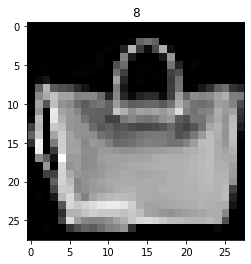

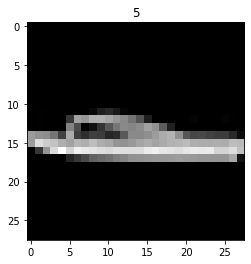

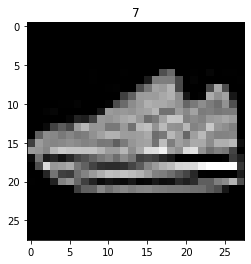

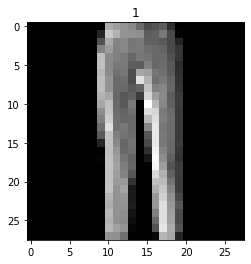

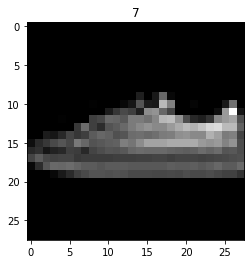

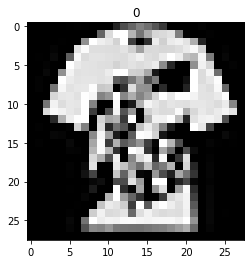

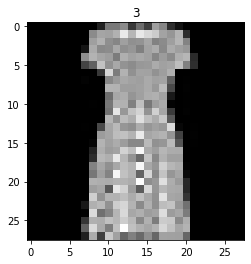

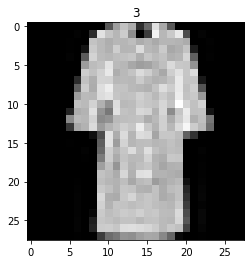

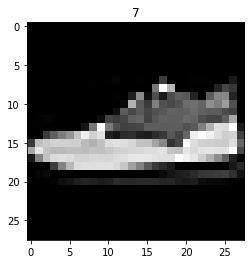

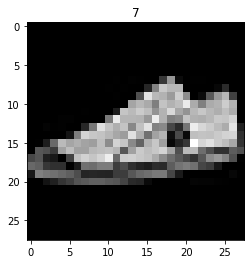

In [5]:
for index, row in testing_sample.iterrows():
    row_values = row.values
    label = row_values[0]
    row_values = row_values[1:].reshape((28, 28))
    
    plt.imshow(row_values, cmap = "gray")
    plt.title(label)
    plt.show()

In [6]:
fashion_attributes = fashion_data.drop("label", axis = 1).values
fashion_labels = fashion_data.label.values

In [8]:
type(fashion_attributes), type(fashion_labels)

(numpy.ndarray, numpy.ndarray)

In [9]:
fashion_attributes = fashion_attributes.astype(np.float64) / 255.0

In [16]:
NUM_COLUMNS = fashion_attributes.shape[1]
NUM_LABELS = len(set(fashion_labels))

DROPOUT_RATE = 0.05

In [17]:
reg = L1L2(l1 = 0.01, l2 = 0.0001)

In [38]:
nn_model = Sequential([
    Input(NUM_COLUMNS),
    Dense(20, activation = "relu"),
    Dropout(DROPOUT_RATE),
    
    BatchNormalization(),
    Dense(10, activation = "relu"),
    Dropout(DROPOUT_RATE),
    
    Dense(30, activation = "relu"),
    Dropout(DROPOUT_RATE),
    Dense(NUM_LABELS, activation = "softmax", kernel_regularizer = reg, bias_regularizer = reg)
])

In [37]:
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 20)                15700     
_________________________________________________________________
dropout_6 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                210       
_________________________________________________________________
batch_normalization (BatchNo (None, 10)                40        
_________________________________________________________________
dropout_7 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 30)                330       
_________________________________________________________________
dropout_8 (Dropout)          (None, 30)               

In [20]:
nn_model.compile(optimizer = Adam(learning_rate = 0.0001), loss = "sparse_categorical_crossentropy")

In [22]:
history = nn_model.fit(fashion_attributes, fashion_labels, epochs = 20, steps_per_epoch = 1000)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 93us/sample - loss: 0.7485
Epoch 2/20
60000/60000 [==============================] - 5s 92us/sample - loss: 0.6495
Epoch 3/20
60000/60000 [==============================] - 6s 96us/sample - loss: 0.6062
Epoch 4/20
60000/60000 [==============================] - 5s 91us/sample - loss: 0.5700
Epoch 5/20
60000/60000 [==============================] - 6s 96us/sample - loss: 0.5482
Epoch 6/20
60000/60000 [==============================] - 6s 95us/sample - loss: 0.5326
Epoch 7/20
60000/60000 [==============================] - 6s 93us/sample - loss: 0.5210
Epoch 8/20
60000/60000 [==============================] - 5s 91us/sample - loss: 0.5115
Epoch 9/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.5010
Epoch 10/20
60000/60000 [==============================] - 6s 93us/sample - loss: 0.4961
Epoch 11/20
60000/60000 [==============================] - 6s 93us/sample - loss: 0.4878
Epoch 1

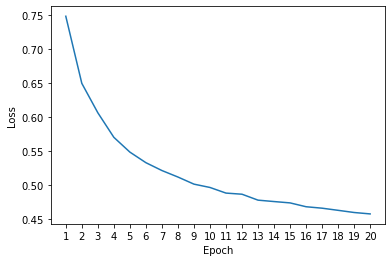

In [31]:
plt.plot(history.history["loss"])
plt.xticks(range(len(history.history["loss"])), range(1, len(history.history["loss"]) + 1))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [47]:
learning_rate_candidates = np.power(10.0, np.arange(-5, 0))

In [48]:
learning_rate_candidates

array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01])

In [51]:
learning_rates = np.random.choice(learning_rate_candidates, size = 3, replace = False)

In [ ]:
# for lr in learning_rates:
#     nn_model.compile(optimizer = Adam(learning_rate))
#     nn_model.fit(...)